In [1]:
import re
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import datasets
from nilearn.image import get_data, load_img, new_img_like, index_img

In [2]:
def format_csv(df):
    tr=2 # 2 second acquisition for each volume
    
    # clean labels for stimuli
    stimuli = df['stim_file']
    stimuli = [re.split('/',file)[0] for file in stimuli]
    stimuli = [re.sub(" ", "_", file) for file in stimuli] # length of 60
    df['condition'] = stimuli
    # convert from time to volumes
    return df

In [3]:
sub1_data_path = "../clean/sub-06/clean_sub-06_task-action_run-4_desc-preproc_bold.nii.gz"
sub1_events = pd.read_csv("../task_data/sub-06/edited_events/sub-06_ses-action01_task-action_run-04_events.tsv", sep="\t")
formatted_events = format_csv(sub1_events)


In [4]:
sub1_events

,onset,duration,trial_type,response_time,stim_file,condition
0,0.000000,12.000000,181.0,0.000000,Rest,Rest
1,12.014948,2.067116,146.0,0.364666,Snowboarding/v_Snowboarding_id_0KjlcJuKW6w_sta...,Snowboarding
2,16.014578,2.000538,6.0,1.135723,Ballet/v_Ballet_id_RB4wORclQtg_start_175.0_lab...,Ballet
3,20.014351,2.000303,118.0,0.000000,Powerbocking/v_Powerbocking_id_rLV8M9LvYUE_sta...,Powerbocking
4,24.014046,2.000616,147.0,0.600413,Spinning/v_Spinning_id_OtRsOADDd7Q_start_46.0_...,Spinning
...,...,...,...,...,...,...
68,280.010160,2.000777,149.0,0.429600,Springboard diving/v_Springboard diving_id_Qnt...,Springboard_diving
69,284.009894,1.999994,56.0,0.742480,Grooming horse/v_Grooming horse_id__ssV2_njZcE...,Grooming_horse
70,288.009523,2.017097,46.0,0.477676,Drum corps/v_Drum corps_id_y9DI_XzSGX4_start_1...,Drum_corps
71,292.009260,2.000175,16.0,0.327184,Brushing teeth/v_Brushing teeth_id_r0W2u57Pqnc...,Brushing_teeth


In [4]:
sub1_data_path = "../clean/sub-06/clean_sub-06_task-action_run-1_desc-preproc_bold.nii.gz"
sub1_events = pd.read_csv("../task_data/sub-06/edited_events/sub-06_ses-action01_task-action_run-01_events.tsv", sep='\t')
formatted_events = format_csv(sub1_events)

In [5]:
tr = 2
fmri_data = load_img(sub1_data_path)
# data_4d = index_img(fmri_data, slice(0, fmri_data.shape[3]))
nvols = fmri_data.shape[3]

In [6]:

volume_times = np.arange(nvols) * tr
resampled_df = pd.DataFrame({'volume': np.arange(nvols),
                            'time': volume_times})

# stimuli = format_csv(sub1_events, nvols)

In [7]:
conditions = []
experiment_onset = formatted_events['onset'][0]
for i, row in formatted_events.iterrows():
    
    onset = row['onset']
    
    dur = row['duration']
    rt = row['response_time']
    cond = row['condition']
    stim_num = row['trial_type']
    
    if i+1  >= len(formatted_events):
        next_onset = onset + dur 
    else:
        next_onset = formatted_events.loc[i+1, 'onset']
    cond_timepoints = np.where((resampled_df['time'] + experiment_onset >= onset) & (resampled_df['time'] < next_onset))[0]
    
    # cond_timepoints = cond_timepoints[0:2] # looks like there may be a brief rest period after every 4 trials
    resampled_df.loc[cond_timepoints, 'condition'] = cond
    resampled_df.loc[cond_timepoints, 'trial_type'] = stim_num
  

/tmp/ipykernel_1397004/2419776214.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Rest' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resampled_df.loc[cond_timepoints, 'condition'] = cond


In [11]:
resampled_df

,volume,time,condition,trial_type
0,0,0,Rest,181.0
1,1,2,Rest,181.0
2,2,4,Rest,181.0
3,3,6,Rest,181.0
4,4,8,Rest,181.0
...,...,...,...,...
151,151,302,Rest,181.0
152,152,304,Rest,181.0
153,153,306,Rest,181.0
154,154,308,Rest,181.0


In [19]:
resampled_df['condition'].to_csv("events_byVolume.tsv", header=False, sep='\t')

In [17]:
for el in resampled_df['condition']:
    print(el)

Rest
Rest
Rest
Rest
Rest
Rest
Rest
Snowboarding
Snowboarding
Ballet
Ballet
Powerbocking
Powerbocking
Spinning
Spinning
Cricket
Cricket
Rest
Rest
Baking_cookies
Baking_cookies
Playing_rubik_cube
Playing_rubik_cube
Shot_put
Shot_put
Waxing_skis
Waxing_skis
Playing_drums
Playing_drums
Rest
Rest
Rock_climbing
Rock_climbing
Playing_ice_hockey
Playing_ice_hockey
Snow_tubing
Snow_tubing
Mowing_the_lawn
Mowing_the_lawn
Trimming_branches_or_hedges
Trimming_branches_or_hedges
Rest
Rest
Shuffleboard
Shuffleboard
Bullfighting
Bullfighting
Tumbling
Tumbling
Snatch
Snatch
Carving_jack-o-lanterns
Carving_jack-o-lanterns
Rest
Rest
Tango
Tango
Hammer_throw
Hammer_throw
Archery
Archery
Playing_racquetball
Playing_racquetball
Paintball
Paintball
Rest
Rest
Croquet
Croquet
Making_a_sandwich
Making_a_sandwich
Smoking_hookah
Smoking_hookah
Beach_soccer
Beach_soccer
Bathing_dog
Bathing_dog
Rest
Rest
Doing_kickboxing
Doing_kickboxing
Windsurfing
Windsurfing
Painting_fence
Painting_fence
Cleaning_windows
Cleani

In [9]:
y = resampled_df['condition']
run = resampled_df['trial_type']
condition_mask = y.isin(["Skiing", "Capoeira"])
fmri_img = index_img(sub1_data_path, condition_mask)
y,run = y[condition_mask], run[condition_mask]

In [10]:
mask_img = load_img("/home/zachkaras/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz")

In [11]:
process_mask = get_data(mask_img).astype(int)
picked_slice = 29
process_mask[..., (picked_slice + 1) :] = 0
process_mask[..., :picked_slice] = 0
process_mask[:, 30:] = 0
process_mask_img = new_img_like(mask_img, process_mask)

/tmp/ipykernel_3816252/2335580320.py:6: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  process_mask_img = new_img_like(mask_img, process_mask)


In [16]:
n_jobs = 2

# Define the cross-validation scheme used for validation.
# Here we use a KFold cross-validation on the run, which corresponds to
# splitting the samples in 4 folds and make 4 runs using each fold as a test
# set once and the others as learning sets
from sklearn.model_selection import KFold

cv = KFold(n_splits=4)

import nilearn.decoding

# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = nilearn.decoding.SearchLight(
    mask_img,
    process_mask_img=process_mask_img,
    radius=8,
    n_jobs=n_jobs,
    verbose=1,
    cv=cv,
)
searchlight.fit(fmri_img, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/home/zachkaras/fsl/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/zachkaras/fsl/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/zachkaras/fsl/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/zachkaras/fsl/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/zachkaras/fsl/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/zachkaras/fsl/lib/python3.11/

SearchLight(cv=KFold(n_splits=4, random_state=None, shuffle=False),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7efc2b8e3cd0>,
            n_jobs=2,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x7efc2bb68050>,
            radius=8, verbose=1)

In [17]:
from nilearn.maskers import NiftiMasker

# For decoding, standardizing is often very important
nifti_masker = NiftiMasker(
    mask_img=mask_img,
    runs=run,
    standardize="zscore_sample",
    memory="nilearn_cache",
    memory_level=1,
)
fmri_masked = nifti_masker.fit_transform(fmri_img)

from sklearn.feature_selection import f_classif

_, p_values = f_classif(fmri_masked, y)
p_values = -np.log10(p_values)
p_values[p_values > 10] = 10
p_unmasked = get_data(nifti_masker.inverse_transform(p_values))

/home/zachkaras/fsl/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


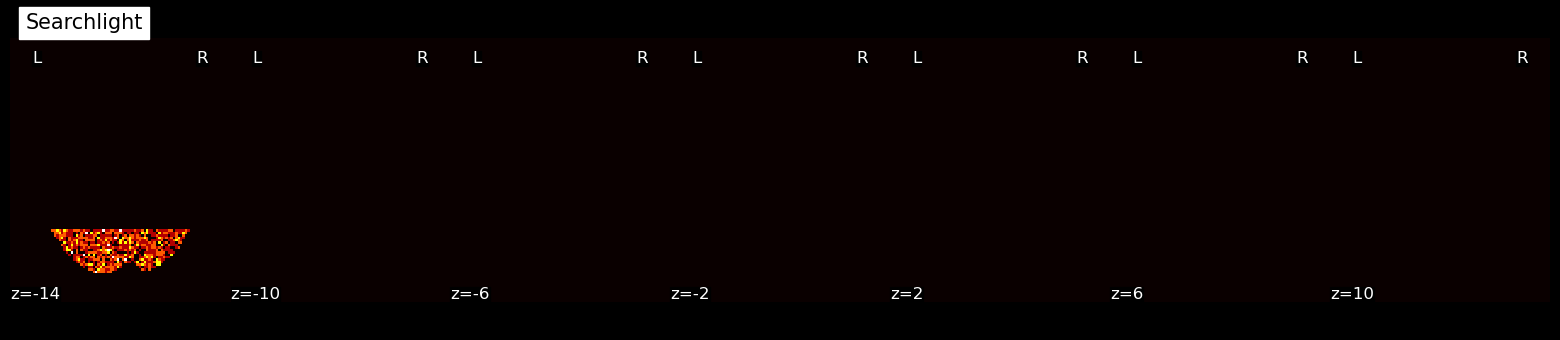

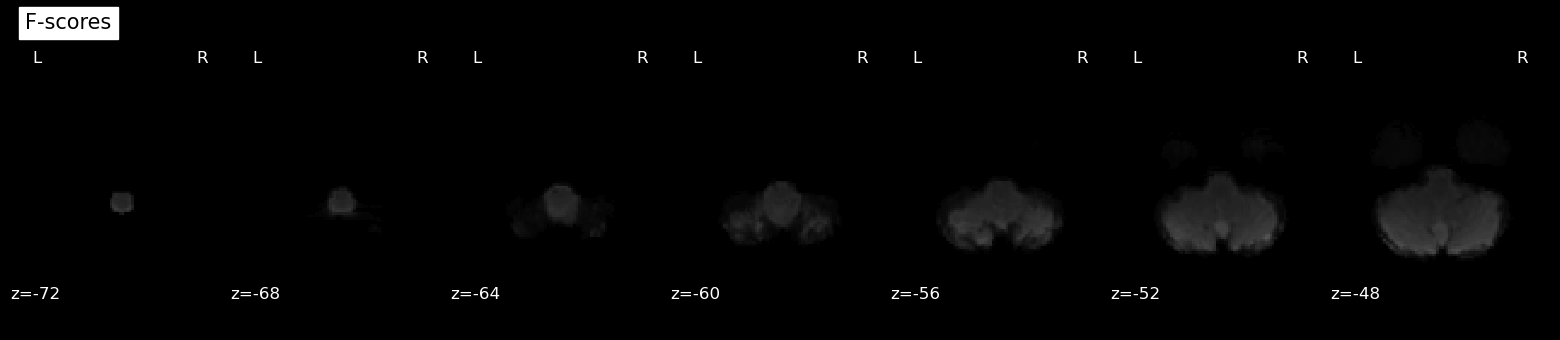

In [18]:
from nilearn import image

mean_fmri = image.mean_img(fmri_img)

from nilearn.plotting import plot_img, plot_stat_map, show

searchlight_img = new_img_like(mean_fmri, searchlight.scores_)

# Because scores are not a zero-center test statistics, we cannot use
# plot_stat_map
plot_img(
    searchlight_img,
    bg_img=mean_fmri,
    title="Searchlight",
    display_mode="z",
    # cut_coords=[-9],
    # vmin=0.42,
    cmap="hot",
    # threshold=0.2,
    black_bg=True,
)

# F_score results
p_ma = np.ma.array(p_unmasked, mask=np.logical_not(process_mask))
f_score_img = new_img_like(mean_fmri, p_ma)
plot_stat_map(
    f_score_img,
    mean_fmri,
    title="F-scores",
    display_mode="z",
    # cut_coords=[-9],
    colorbar=False,
)

show()